# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./Data/Fastest/"
#interesting_files = ["sit.csv", "stand.csv", "walk.csv"]
interesting_labels = ['stand', 'walk','jump','fall']
save_filename = "activity"

D:\Users\farha\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\farha\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\farha\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\farha\Anaconda3\envs\tensorflow\lib\site-packages

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [2]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
        if 'label' in df.columns:
            pass
        else:df['label'] = str(label)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
#     frame = frame.drop_duplicates()
    
    if len(df.columns) == 19 :
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','lx','ly','lz','mx','my','mz','ma','mg','ml','mm','label']
    
    else :
       
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','ma','mg','label']
#     if label == 'fall':
#         frame = frame.drop_duplicates()
        
#         frame = frame.query("mg >= 10 ")
#     if label =='jump':
        
#         frame = frame.query("mg <= 6")
    
#     else : pass
    frame = frame[1000:16000]
    
    print(frame.shape)
    print(len(df.columns))
    frame.to_csv("./Data/Fastest/activity_"+str(label)+".csv",index = False,header=new_header)
    

In [3]:
path1 = r".\Data\Fastest\stand"
label1 = "stand"
path2 = r".\Data\Fastest\walk"
label2 = "walk"
path3 = r".\Data\Fastest\jump"
label3 = "jump"
path4 = r".\Data\Fastest\Fall"
label4 = "fall"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
data_concate_label(path3,label3)
data_concate_label(path4,label4)

(15000, 11)
11
(15000, 11)
11
(15000, 11)
11
(15000, 11)
11


# Concate all data into one .csv file

In [4]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
#     df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+str(i+1)+'.csv',parse_dates=[['DATE', ' TIME']],header = 0)
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
# df['ts'] = df[['DATE_TIME']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# df = df.assign(DATE_TIME=df['ts'])
# if len(df.columns) == 19 :
drop_list = ['DATE','TIME']
# else :pass

# drop_list = ['DATE','TIME','ma','mg']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# df.rename(columns = {'DATE_TIME':'ts'}, inplace = True) 
all_data_filename = "total.csv"
df.to_csv(interesting_dir+all_data_filename)

# df.reset_index(inplace = True) 
df

11


ax        ay        az        gx        gy        gz        ma  \
0      9.760324  0.236889  1.165305 -0.003663  0.014653 -0.017096  9.832495   
1      9.786645  0.200997  1.189233 -0.003663  0.014653 -0.017096  9.860684   
2      9.786645  0.200997  1.189233 -0.006106  0.019538 -0.018317  9.860684   
3      9.743574  0.215354  1.162912 -0.006106  0.019538 -0.018317  9.815089   
4      9.743574  0.215354  1.162912 -0.006106  0.019538 -0.021980  9.815089   
...         ...       ...       ...       ...       ...       ...       ...   
14995 -1.533799  0.641277  8.563912  0.768079 -0.536068  0.829134  8.723782   
14996 -1.469193  0.636491  8.702696  0.768079 -0.536068  0.829134  8.848761   
14997 -1.469193  0.636491  8.702696  0.638641 -0.700918  0.799828  8.848761   
14998 -1.227518  0.701097  8.896515  0.638641 -0.700918  0.799828  9.008125   
14999 -1.227518  0.701097  8.896515  0.446927 -0.732667  0.736330  9.008125   

             mg  label  
0      0.022812  stand  
1      0.022812  stand  
2      0.027468  stand  
3      0.027468  stand  
4      0.030035  stand  
...         ...    ...  
14995  1.250911   fall  
14996  1.250911   fall  
14997  1.240513   fall  
14998  1.240513   fall  
14999  1.130808   fall  

[60000 rows x 9 columns]

# Feature correlation (optional)

In [5]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)
#print(df_cor["label"])
#print(traindf)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()
# X.dropna()
# X.fillna('mean')

['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ma', 'mg']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
ma    0
mg    0
dtype: int64

[0.13558345 0.12393668 0.14968354 0.09235567 0.1022051  0.13459255
 0.08728478 0.17435822]


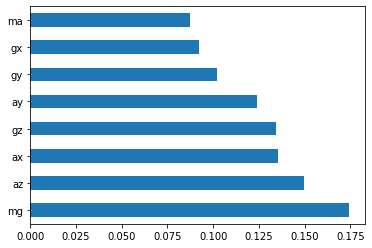

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

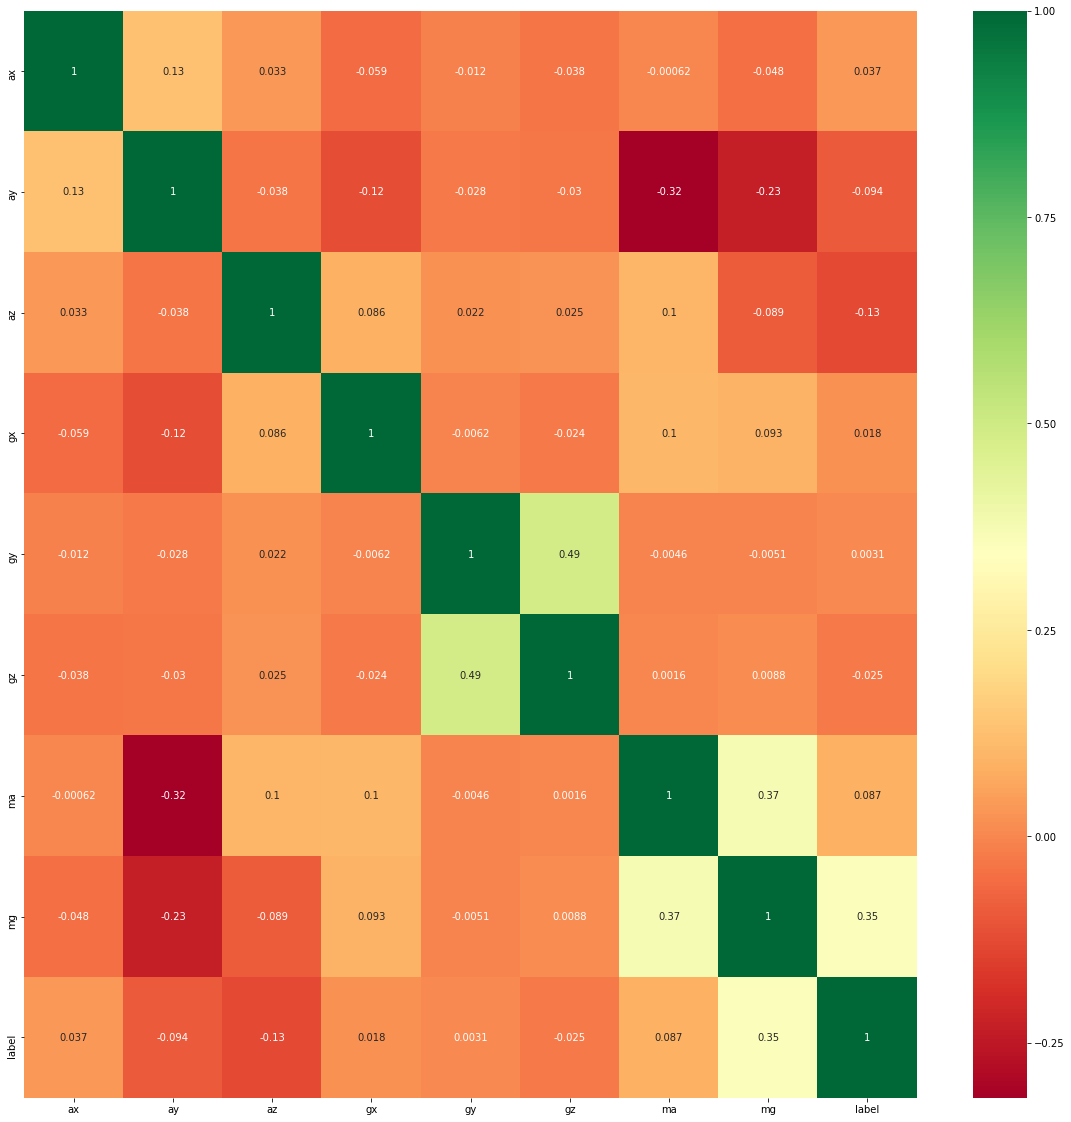

In [7]:
#get correlations of each features in dataset

corrmat = df_cor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
num_feats= len(feature_name)
X.columns.tolist()

['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ma', 'mg']

In [9]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X, y,num_feats)
cor_val=[abs(x) for x in cor_list]
cor_result = dict(zip(cor_feature, cor_val))
myDict = {key:val for key, val in cor_result.items() if val > 0}
{k: v for k, v in sorted(myDict.items(),reverse=True, key=lambda item: item[1])}

{'mg': 0.35318028345401936,
 'gz': 0.1303831033478564,
 'gx': 0.09395734767617347,
 'az': 0.0871424686589664,
 'gy': 0.03688707485882915,
 'ay': 0.024549227236268158,
 'ax': 0.017918838432849717,
 'ma': 0.0030826327941829933}

In [10]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


       index         ax        ay        az        gx        gy        gz  \
46000   1000 -10.102497 -2.120041  7.118648  1.428700 -0.540952  0.116006   
46001   1001 -10.102497 -2.120041  7.118648  1.541042 -0.602008  0.113563   
46002   1002  -9.901500 -2.220539  7.482356  1.541042 -0.602008  0.113563   
46003   1003  -9.901500 -2.220539  7.482356  1.605761 -0.666727  0.101352   
46004   1004  -9.774680 -2.287539  8.051848  1.605761 -0.666727  0.101352   
...      ...        ...       ...       ...       ...       ...       ...   
49995   4995   1.385444 -6.022735  7.477571  0.068382 -0.004884 -0.008548   
49996   4996   1.320838 -5.984449  7.523035  0.068382 -0.004884 -0.008548   
49997   4997   1.320838 -5.984449  7.523035  0.050066 -0.014653 -0.008548   
49998   4998   1.280160 -6.017949  7.578069  0.050066 -0.014653 -0.008548   
49999   4999   1.280160 -6.017949  7.578069  0.032970 -0.018317 -0.012211   

              ma        mg label  
46000  12.539145  1.532080  fall  
46001

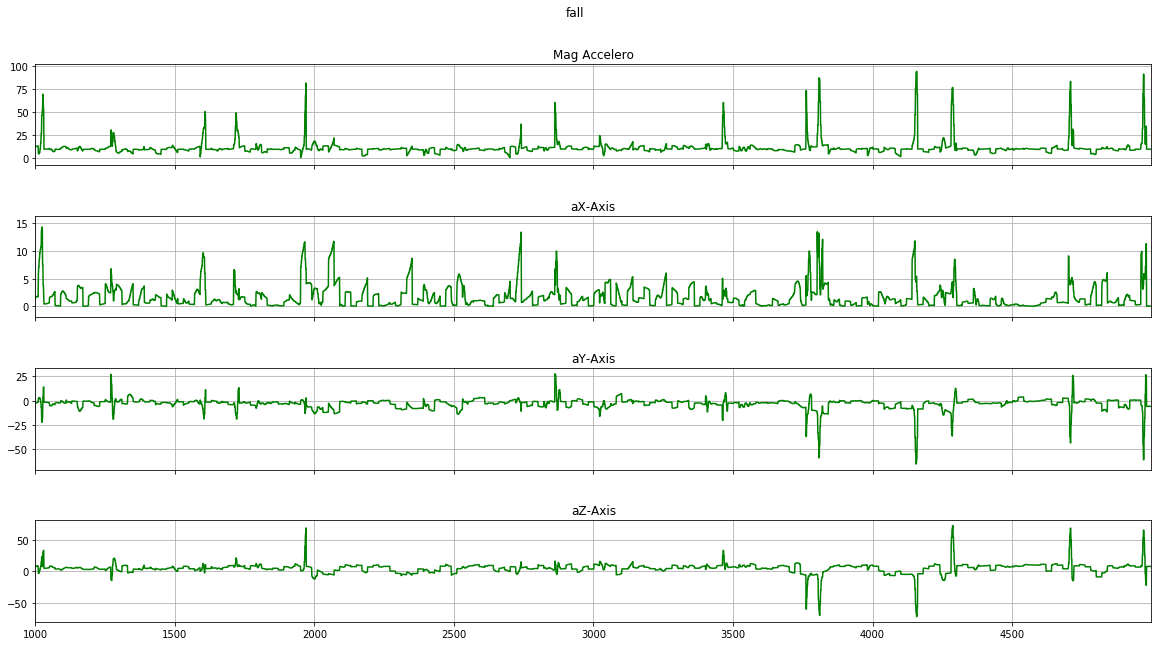

      index        ax        ay        az        gx        gy        gz  \
1000   1000 -8.147561 -3.330809  3.498307 -0.024422  0.081814 -0.006106   
1001   1001 -8.154739 -3.328416  3.491128 -0.024422  0.081814 -0.006106   
1002   1002 -8.154739 -3.328416  3.491128  0.013432  0.092804  0.008548   
1003   1003 -8.185846 -3.326024  3.527021  0.013432  0.092804  0.008548   
1004   1004 -8.185846 -3.326024  3.527021  0.043960  0.101352  0.028086   
...     ...       ...       ...       ...       ...       ...       ...   
4995   4995  9.860822  0.267996  1.026521  0.017096 -0.004884 -0.002442   
4996   4996  9.889536  0.270389  1.019342  0.017096 -0.004884 -0.002442   
4997   4997  9.889536  0.270389  1.019342  0.015874 -0.004884  0.001221   
4998   4998  9.973285  0.246461  1.019342  0.015874 -0.004884  0.001221   
4999   4999  9.973285  0.246461  1.019342  0.018317 -0.002442  0.006106   

             ma        mg  label  
1000   9.471810  0.085600  stand  
1001   9.474498  0.085600  st

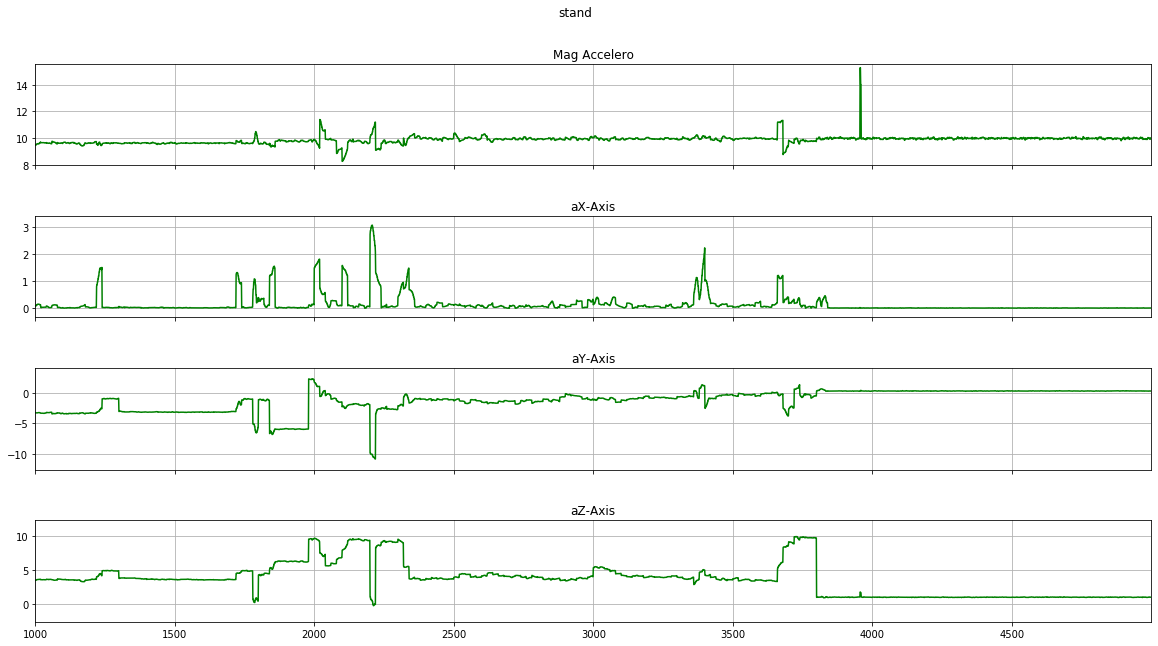

       index        ax        ay        az        gx        gy        gz  \
31000   1000 -4.299902  1.624726  1.667797  0.341911 -0.467686 -0.801049   
31001   1001 -4.393222  1.727618  1.873580  0.341911 -0.467686 -0.801049   
31002   1002 -4.393222  1.727618  1.873580  0.277192 -0.539731 -1.172267   
31003   1003 -4.340580  1.653441  2.153540  0.277192 -0.539731 -1.172267   
31004   1004 -4.340580  1.653441  2.153540  0.234453 -0.582470 -1.516620   
...      ...       ...       ...       ...       ...       ...       ...   
34995   4995 -8.817552 -4.474578  4.426722 -0.249107  0.855999 -2.046582   
34996   4996 -8.571091 -4.503292  4.654040 -0.249107  0.855999 -2.046582   
34997   4997 -8.571091 -4.503292  4.654040 -0.152639  0.866989 -2.027045   
34998   4998 -8.305488 -4.520042  4.960321 -0.152639  0.866989 -2.027045   
34999   4999 -8.305488 -4.520042  4.960321 -0.041518  0.880421 -2.002622   

              ma        mg label  
31000   4.889831  0.988591  jump  
31001   5.078914 

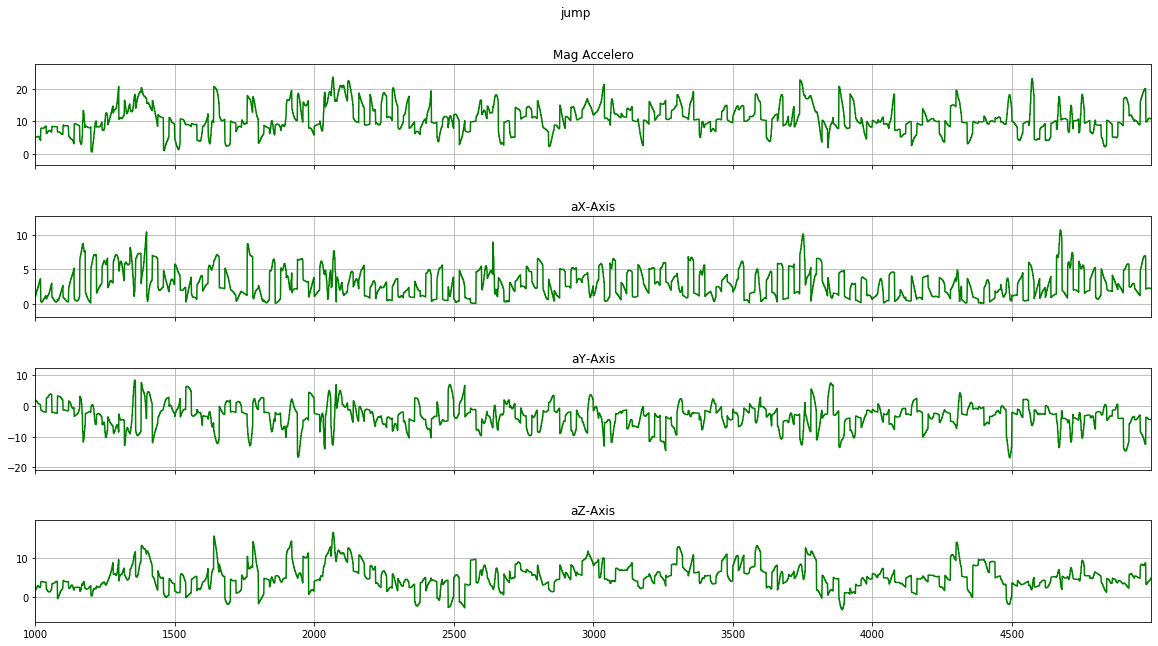

       index        ax        ay        az        gx        gy        gz  \
16000   1000  7.884351 -2.629712  4.826323 -0.162408  0.195378  1.315137   
16001   1001  7.779067 -2.557927  4.749753 -0.162408  0.195378  1.315137   
16002   1002  7.779067 -2.557927  4.749753 -0.126996  0.177061  1.232101   
16003   1003  7.690532 -2.483750  4.687540 -0.126996  0.177061  1.232101   
16004   1004  7.690532 -2.483750  4.687540 -0.086699  0.152639  1.141739   
...      ...       ...       ...       ...       ...       ...       ...   
19995   4995  3.771089 -1.105484  7.082755  0.505540  1.205237  1.334674   
19996   4996  3.565306 -1.060020  6.920043  0.505540  1.205237  1.334674   
19997   4997  3.565306 -1.060020  6.920043  0.522636  1.189362  1.344443   
19998   4998  3.318845 -1.009771  6.790831  0.522636  1.189362  1.344443   
19999   4999  3.318845 -1.009771  6.790831  0.561711  1.167382  1.355433   

             ma        mg label  
16000  9.611023  1.339453  walk  
16001  9.466627  1.

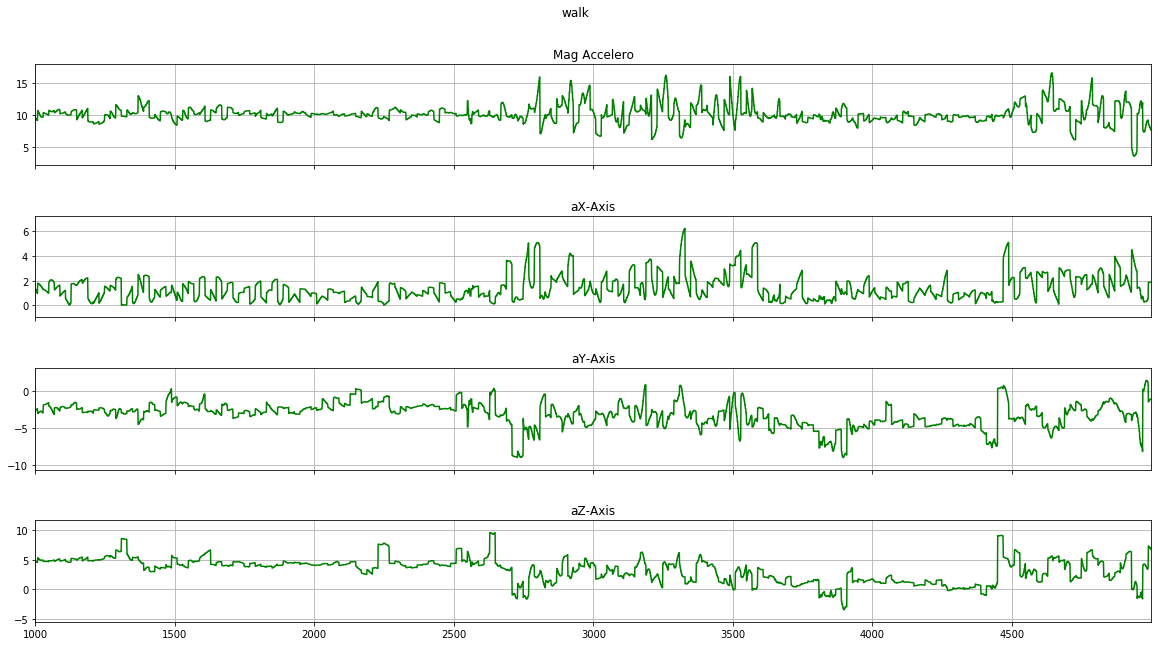

In [11]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(20, 10), sharex=True)
    plot_axis(ax0, data['index'], data['ma'], 'Mag Accelero')
    plot_axis(ax1, data['index'], data['mg'], 'aX-Axis')
    plot_axis(ax2, data['index'], data['ay'], 'aY-Axis')
    plot_axis(ax3, data['index'], data['az'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
Fs=200
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][1000:5000]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [12]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.8
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

#print("Number of train samples/label: ", len(train_stand))
#print("Number of test samples/label: ", len(test_stand))

# train_data = train_data.iloc[18:,]
# test_data = test_data.iloc[74:,]
print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))

#train_label = train_data.iloc[:, 12]
#test_label = test_data.iloc[:, 12]
#train_label = train_label.to_frame()
#test_label = test_label.to_frame()

train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  48000
Number of test samples:  12000


# Data Segmentation (Sliding Window)

In [13]:
N_TIME_STEPS = 100 #sliding window length
STEP = 20 #Sliding window step size
N_FEATURES = 4


def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
#         ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

#         lx = x['lx'].values[i: i + n_time_steps]
#         ly = x['ly'].values[i: i + n_time_steps]
#         lz = x['lz'].values[i: i + n_time_steps]
        
#         gx = x['gx'].values[i: i + n_time_steps]
#         gy = x['gy'].values[i: i + n_time_steps]
#         gz = x['gz'].values[i: i + n_time_steps]

#         mx = x['mx'].values[i: i + n_time_steps]
#         my = x['my'].values[i: i + n_time_steps]
#         mz = x['mz'].values[i: i + n_time_steps]
        
        ma =  x['ma'].values[i: i + n_time_steps]
        mg =  x['mg'].values[i: i + n_time_steps]
#         ml =  x['ml'].values[i: i + n_time_steps]
#         mm =  x['mm'].values[i: i + n_time_steps]
                
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
#         segments.append([ax, ay, az, gx, gy, gz, lx, ly, lz, mx, my, mz, ma, mg, ml, mm])
#         segments.append([ax, ay, az, gx, gy, gz, mx, my, mz])
#         segments.append([ax, ay, az,gx, gy,gz,mg])
        segments.append([ay, az,ma,mg])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [14]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [15]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Import DL Library

In [16]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import Attention
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

N_CLASSES = 4
N_HIDDEN_UNITS = 64
L2 = 0.000001

Using TensorFlow backend.


# LSTM Model (Training) 

In [17]:
class attention():
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
# LSTM model
from keras.backend import clear_session

clear_session()
model = Sequential()
# model.add(Embedding(max_words, emb_dim, input_length=max_len))
# model.add(attention(return_sequences=True)) # receive 3D and output 3D
model.add(LSTM(64, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten(name='Flatten'))
model.add(Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2"))

#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_1"),
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_2"),
#     Dropout(0.2),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
# ])

model.summary()

opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE = 64
N_EPOCHS = 30

lstm = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test))






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 100, 64)           17664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 64)           24832     
_________________________________________________________________
Flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                409664    
_________________________________________________________________
Dense_2 (Dense)              (None, 4)                 260       
Total params: 452,420
Trainable params: 452,420
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2395 samples, validate on 5

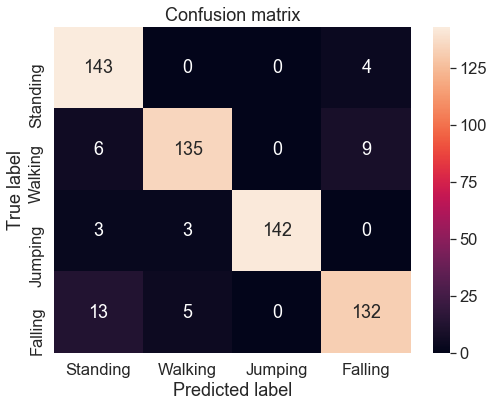

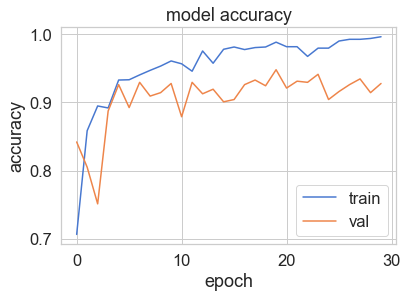

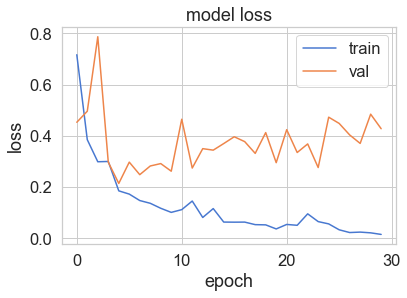

In [47]:
# use LSTM model to predict

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

LABELS = ['Standing', 'Walking','Jumping','Falling']

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
# plt.ylim((16,14))
plt.xlabel('Predicted label')
plt.show();

plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Save the model into .pb file

In [ ]:
N_TIME_STEPS = 180 #sliding window length
STEP = 30 #Sliding window step size
N_FEATURES = 6


In [48]:
# Save LSTM model

output_node_name = "Dense_2/Softmax"
MODEL_LSTM = str(N_TIME_STEPS)+"_"+str(STEP)+"_"+str(N_FEATURES)+"_"+str(N_CLASSES)+"_xyxzmamg"

tf.train.write_graph(K.get_session().graph_def, './models/LSTM/', \
        MODEL_LSTM + '_graph.pbtxt')
saver = tf.train.Saver()
saver.save(K.get_session(), './models/LSTM/' + MODEL_LSTM + '.chkp')

freeze_graph.freeze_graph('./models/LSTM/' +MODEL_LSTM+ '_graph.pbtxt', None, \
    False, './models/LSTM/' + MODEL_LSTM+ '.chkp', output_node_name, \
    "save/restore_all", "save/Const:0", \
    './models/LSTM/' +MODEL_LSTM + '.pb', True, "")



INFO:tensorflow:Restoring parameters from ./models/LSTM/100_20_4_4_xyxzmamg.chkp
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.


node {
  name: "keras_learning_phase/input"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_BOOL
        tensor_shape {
        }
        bool_val: false
      }
    }
  }
}
node {
  name: "keras_learning_phase"
  op: "PlaceholderWithDefault"
  input: "keras_learning_phase/input"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "LSTM_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 100
        }
        dim {
          size: 4
        }
      }
    }
  }
}
node {
  name: "LSTM_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
  

# CNN Model 

In [ ]:
# from keras.backend import clear_session

# clear_session()
# # CNN model

# model = Sequential()

# model.add(Conv2D(N_HIDDEN_UNITS * 3, kernel_size = 3, input_shape = (X_train.shape[1], X_train.shape[2], 1), padding = 'same',
#                  activation = 'relu', name="Conv2D_Layer1"))
# model.add(Conv2D(N_HIDDEN_UNITS * 2, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer2"))
# model.add(Conv2D(N_HIDDEN_UNITS, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer3"))
# model.add(Flatten(name="Flatten_Layer"))
# model.add(Dense(N_CLASSES, activation = 'softmax', name="CNN_output"))

# model.summary()

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# BATCH_SIZE = 24
# N_EPOCHS = 100

# cnn = model.fit(np.expand_dims(X_train, axis=-1), y_train,
#                 batch_size=BATCH_SIZE, epochs=N_EPOCHS,
#                 validation_data=(np.expand_dims(X_test, axis=-1), y_test))

In [ ]:
# model.save("model_har.h5")

In [ ]:
# y_pred_ohe = model.predict(np.expand_dims(X_test, axis=-1))
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

# LABELS = [ 'standing', 'walking']

# plt.figure(figsize=(8, 6))
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("CNN Result Confusion Matrix")
# plt.ylabel('True label')
# # plt.ylim((16,14))
# plt.xlabel('Predicted label')
# plt.show();

# plt.plot(cnn.history['acc'])
# plt.plot(cnn.history['val_acc'])
# plt.title('CNN model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# plt.plot(cnn.history['loss'])
# plt.plot(cnn.history['val_loss'])
# plt.title('CNN model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# Save model to .pb file

In [ ]:
# # Save CNN model
# output_node_name = "CNN_output/Softmax"
# MODEL_NAME = "2020_02_09_CNN"

# tf.train.write_graph(K.get_session().graph_def, './models/CNN/', \
#         MODEL_NAME + '_graph.pbtxt')
# saver = tf.train.Saver()
# saver.save(K.get_session(), './models/CNN/' + MODEL_NAME + '.chkp')

# freeze_graph.freeze_graph('./models/CNN/' + MODEL_NAME + '_graph.pbtxt', None, \
#     False, './models/CNN/' + MODEL_NAME + '.chkp', output_node_name, \
#     "save/restore_all", "save/Const:0", \
#     './models/CNN/' + MODEL_NAME + '.pb', True, "")

# Convert .pb to tflite

In [ ]:
# import tensorflow as tf
# # model_dir='./models/CNN/2020_02_09_CNN.pb'
# model_dir='model_har.h5'

# input_arrays = ['Conv2D_Layer1_input']
# output_arrays = ['CNN_output/Softmax']

# tfc = tf.lite.TFLiteConverter.from_keras_model_file(model_dir)
# # converter =  tfc.from_keras_model_file(model_dir, input_arrays, output_arrays)

# tflite_model = tfc.convert()
# open("CNN_model.tflite","wb").write(tflite_model)

# Make sure the model output and input name

In [ ]:
# import tensorflow as tf
# gf = tf.GraphDef()   
# m_file = open(r"D:\Human Activity Recognition\Training\models\LSTM\100_12_walk_stand.pb",'rb')
# gf.ParseFromString(m_file.read())

# with open('somefile.txt', 'a') as the_file:
#     for n in gf.node:
#         the_file.write(n.name+'\n')

# file = open('somefile.txt','r')
# data = file.readlines()
# print ("output name = ")
# print (data[len(data)-1])

# print ("Input name = ")
# file.seek ( 0 )
# print (file.readline())